classification with decisiontree

In [3]:
#import all the libraries related
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,confusion_matrix
from sklearn import tree

In [12]:
# now load the dataset
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1]:
# df.info()

In [3]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [4]:
X=pd.get_dummies(X,columns=['sex'])
# here it converts the sex male and female to binary 0 and 1.

In [5]:
#check null values
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X.age.fillna(value=X['age'].mean(),inplace=True)

In [7]:
#now split the variables
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
#importing the model
model=DecisionTreeClassifier()

In [9]:
#train the model or fit the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred=model.predict(X_test)

In [11]:
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("precision score: ",precision_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))

Accuracy score: 0.776536312849162
precision score:  0.7428571428571429
f1 score:  0.7222222222222223
recall score:  0.7027027027027027
confusion matrix: [[87 18]
 [22 52]]


In [12]:
# accuracy score ranges from 0 and 1. i.e 1 indicating perfect accuracy. and 0 means model is making random predictions.
# some might have 0.8 to be high score and 0.95 effective score.(accuracy score)

#precision score; ranges from 0 and 1. 1 indicates perfect precision and 0 indicates no precison.(0.7 is often considered good)

# f1 score:combination of precision and recall into a single score.
#ranges from 0 and 1. 1 indicates perfect recall and 0 indicates poor.(0.7 is often considered good)

# 



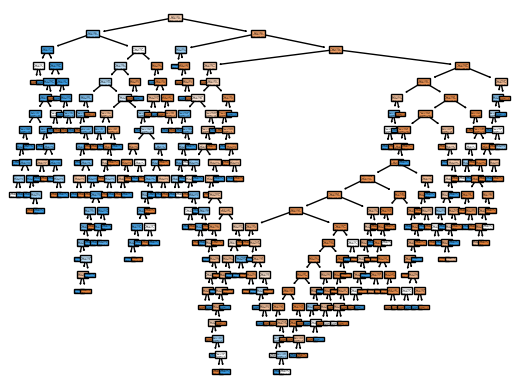

<Figure size 640x480 with 0 Axes>

In [13]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("tree.png")

In [17]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[87, 18],
       [22, 52]], dtype=int64)

<AxesSubplot:>

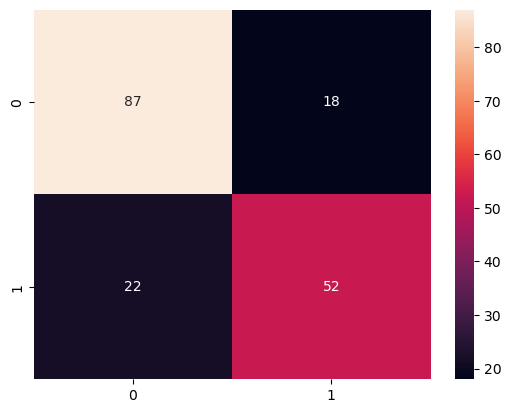

In [18]:
sns.heatmap(cm,annot=True)